In [292]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

columns=['Position', 'Speed', 'Time', 'Started']

# Load .log file
with open('./arduino/putty.log', 'r') as f:
    lines = f.readlines()

    # Remove first and last lines
    lines = lines[2:-1]

    df = pd.DataFrame([l.split(',') for l in lines], columns=columns)

warnings.filterwarnings("ignore")

In [293]:
# Convert to numeric
for column in columns:
    df[column] = pd.to_numeric(df[column])

df.head()

,Position,Speed,Time,Started
0,0,0.0,2382408,0
1,0,0.0,2383256,0
2,0,0.0,2384104,0
3,0,0.0,2384952,0
4,0,0.0,2385792,0


<Axes: xlabel='Time'>

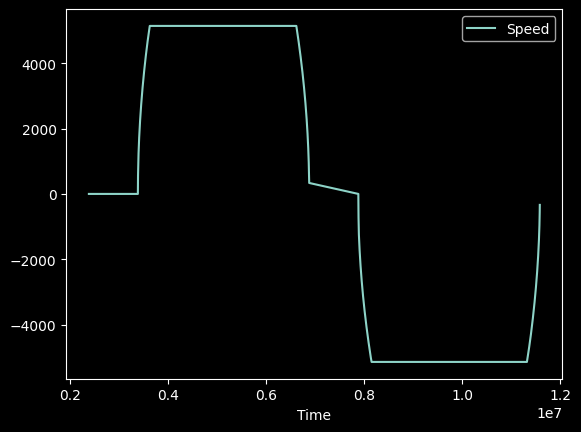

In [294]:
df.plot(x='Time', y='Speed')

In [295]:
df.max()

Position        1759.00
Speed           5144.66
Time        11579568.00
Started            1.00
dtype: float64

In [296]:
df.tail()

,Position,Speed,Time,Started
4172,5,-963.48,11572080,1
4173,4,-850.13,11573948,1
4174,3,-719.34,11575820,1
4175,2,-559.49,11577692,1
4176,1,-335.69,11579568,1


In [297]:
df = df[:-3]
df.tail()

,Position,Speed,Time,Started
4169,8,-1243.24,11566224,1
4170,7,-1157.50,11568176,1
4171,6,-1064.90,11570124,1
4172,5,-963.48,11572080,1
4173,4,-850.13,11573948,1


In [298]:
# Calculate angle from position
spr = 1600

df['Angle'] = df['Position'].apply(lambda x: x * 360 / spr)
df['Radian'] = df['Angle'].apply(lambda x: x * 3.14159 / 180)
df['Speed'] = df['Speed'] * (2 * np.pi) / spr
df['Time'] = df['Time'] - df['Time'].min() / 1000000
df['Acceleration'] = df['Speed'].diff() / df['Time'].diff()
df.head()

,Position,Speed,Time,Started,Angle,Radian,Acceleration
0,0,0.0,2.382406e+06,0,0.0,0.0,NaN
1,0,0.0,2.383254e+06,0,0.0,0.0,0.0
2,0,0.0,2.384102e+06,0,0.0,0.0,0.0
3,0,0.0,2.384950e+06,0,0.0,0.0,0.0
4,0,0.0,2.385790e+06,0,0.0,0.0,0.0


In [299]:
# move time column to the end
df = df[['Position', 'Angle', 'Radian', 'Speed', 'Acceleration', 'Time']]
df.head()

,Position,Angle,Radian,Speed,Acceleration,Time
0,0,0.0,0.0,0.0,NaN,2.382406e+06
1,0,0.0,0.0,0.0,0.0,2.383254e+06
2,0,0.0,0.0,0.0,0.0,2.384102e+06
3,0,0.0,0.0,0.0,0.0,2.384950e+06
4,0,0.0,0.0,0.0,0.0,2.385790e+06


In [300]:
df.max()

Position        1.759000e+03
Angle           3.957750e+02
Radian          6.907571e+00
Speed           2.020303e+01
Acceleration    1.155817e-03
Time            1.157395e+07
dtype: float64

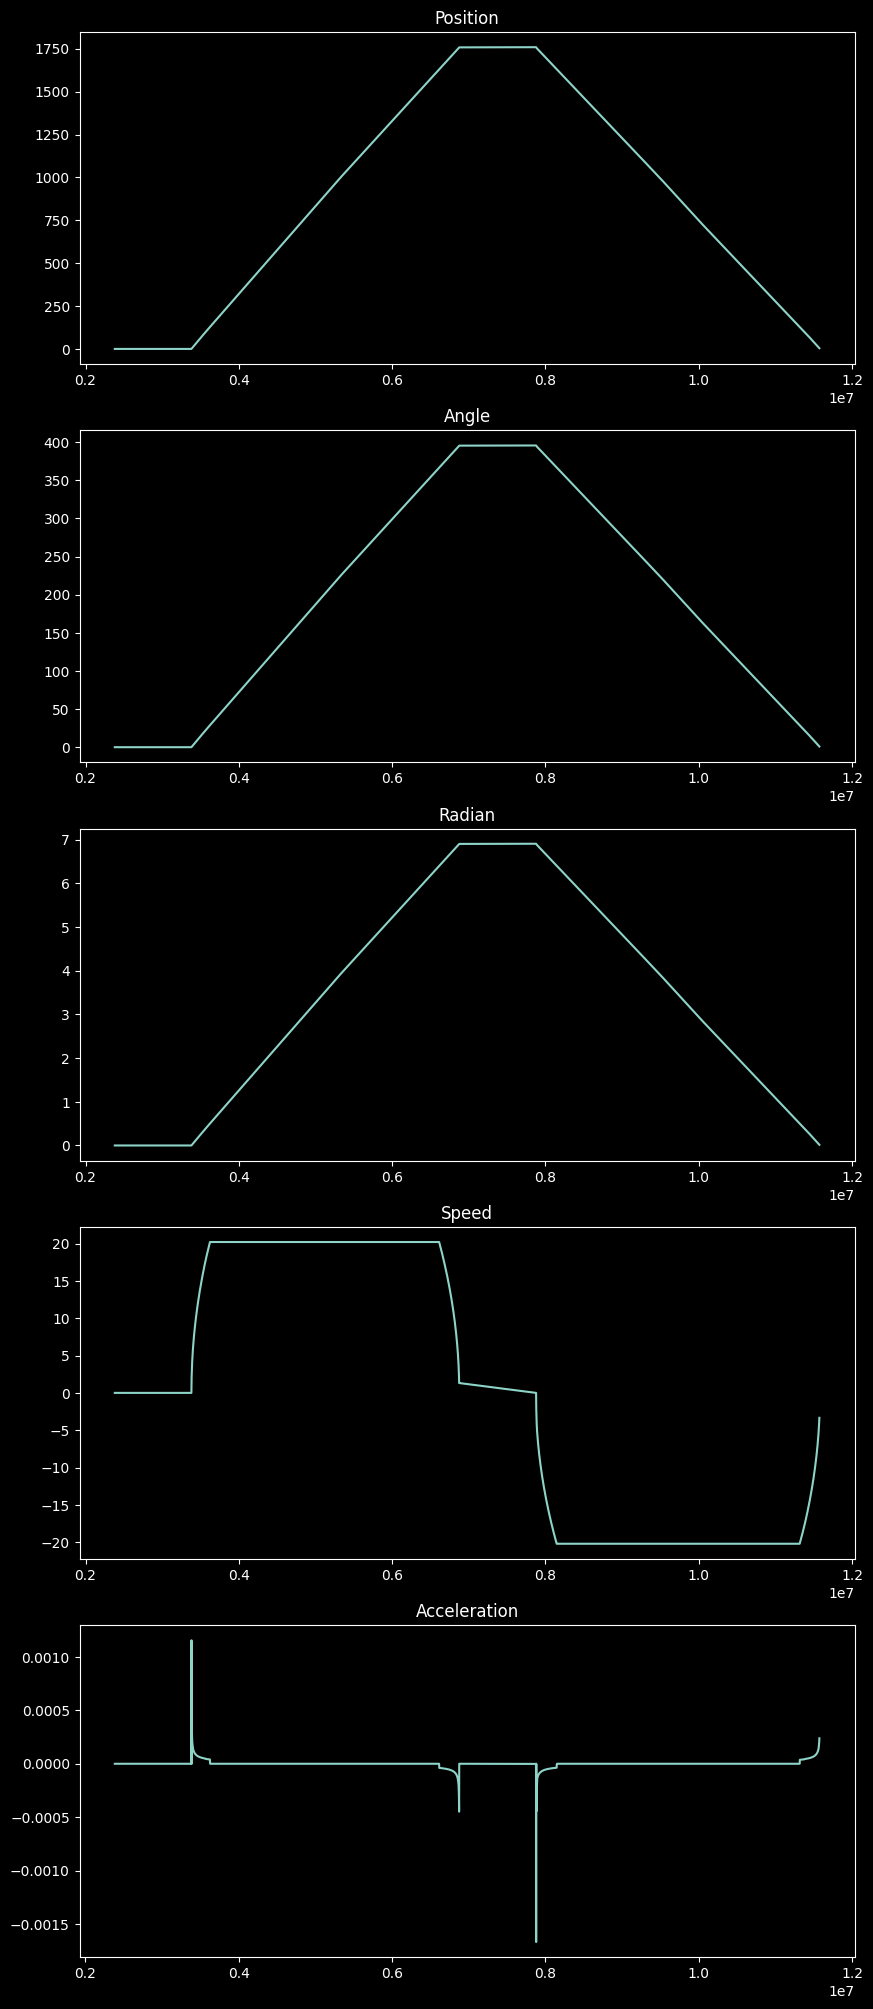

In [301]:
# Plot
columns = df.columns.tolist()
fig, ax = plt.subplots(len(columns) - 1, 1, figsize=(10, 25))
for i, column in enumerate(columns[:-1]):
    ax[i].plot(df['Time'], df[column])
    ax[i].set_title(column)

plt.show()

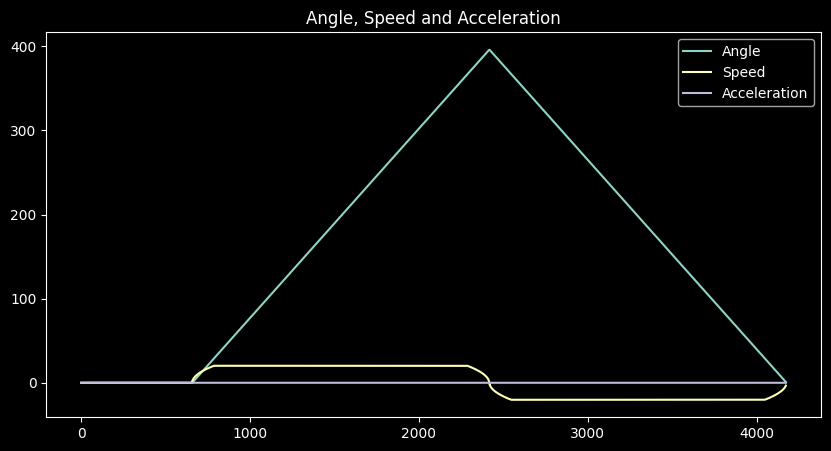

In [302]:
# On the same plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df['Angle'].plot(ax=ax)
df['Speed'].plot(ax=ax)
df['Acceleration'].plot(ax=ax)

# Add legend and set title
ax.legend(['Angle', 'Speed', 'Acceleration'])
ax.set_title('Angle, Speed and Acceleration')

plt.show()

In [303]:
from matplotlib import pyplot as plt
import pandas as pd

# Load .log file
with open('./arduino/experiment-noload.log', 'r') as f:
    lines = f.readlines()

    # Remove first and last lines
    columns = lines[2].split(',')
    columns = [c.strip() for c in columns]
    lines = lines[6:-1]
    
    df = pd.DataFrame([l.split(',') for l in lines], columns=columns)

In [304]:
# Convert to numeric
for column in columns:
    df[column] = pd.to_numeric(df[column])

# df[1100:1105]
df.head()

,Raw Input,Time,Started
0,4090,1958865,0
1,4090,1960597,0
2,4090,1962342,0
3,4090,1964082,0
4,4090,1965804,0


<Axes: xlabel='Time'>

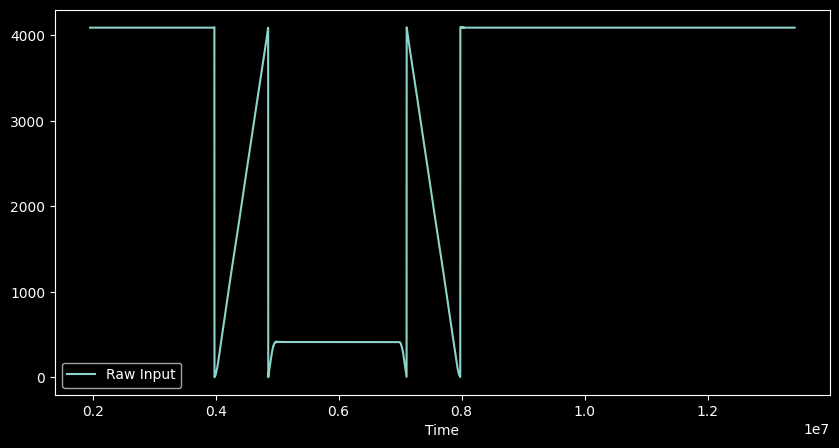

In [305]:
df.plot(x='Time', y='Raw Input', figsize=(10, 5))

In [306]:
# Set starting time to 0
df['Time'] = df['Time'] - df['Time'].min()

"""4092 + 4 = 4096 -> 0
4093 + 4 = 4097 -> 1
4094 + 4 = 4098 -> 2
4095 + 4 = 4099 -> 3
4096 + 4 = 4100 -> 4"""
diff = 4096 - df['Raw Input'].iloc[0] + 2
df['Raw Input'] = df['Raw Input'].apply(lambda x: abs(4096 - (x + diff)) if x + diff > 4095 else x)
diff

8

In [307]:
df['Angle'] = df['Raw Input'].apply(lambda x: x * 360 / 4095)

continuous_angle = [df['Angle'].iloc[0]]

# Calculate into continuous angle
for i in range(1, len(df)):
    delta_angle = df['Angle'][i] - df['Angle'][i - 1]
    if delta_angle > 180:
        delta_angle -= 360
    elif delta_angle < -180:
        delta_angle += 360

    continuous_angle.append(continuous_angle[-1] + delta_angle)

df['Angle'] = continuous_angle


df[1105:1110]

,Raw Input,Time,Started,Angle
1105,2,1920221,0,0.175824
1106,2,1921953,0,0.175824
1107,2,1923703,0,0.175824
1108,2,1925445,0,0.175824
1109,2,1927179,0,0.175824


In [308]:
df['Time'] = df['Time'] / 1000000
df.head()

,Raw Input,Time,Started,Angle
0,2,0.000000,0,0.175824
1,2,0.001732,0,0.175824
2,2,0.003477,0,0.175824
3,2,0.005217,0,0.175824
4,2,0.006939,0,0.175824


In [309]:
df['Radian'] = df['Angle'].apply(lambda x: x * 3.14159 / 180)
df['Angular Velocity'] = df['Radian'].diff() / df['Time'].diff()

y_columns = ['Time', 'Started']

columns = df.columns.tolist()
columns = [c for c in columns if c not in y_columns] + y_columns
df = df[columns]

df[1100:1105]

,Raw Input,Angle,Radian,Angular Velocity,Time,Started
1100,2,0.175824,0.003069,0.0,1.911533,0
1101,2,0.175824,0.003069,0.0,1.913269,0
1102,2,0.175824,0.003069,0.0,1.915008,0
1103,2,0.175824,0.003069,0.0,1.916757,0
1104,2,0.175824,0.003069,0.0,1.918491,0


In [310]:
columns = ['Raw Input', 'Angle', 'Radian', 'Angular Velocity', 'Started', 'Time']
df = df[columns]
df.head()

,Raw Input,Angle,Radian,Angular Velocity,Started,Time
0,2,0.175824,0.003069,NaN,0,0.000000
1,2,0.175824,0.003069,0.0,0,0.001732
2,2,0.175824,0.003069,0.0,0,0.003477
3,2,0.175824,0.003069,0.0,0,0.005217
4,2,0.175824,0.003069,0.0,0,0.006939


In [311]:
# cut off at 4 seconds
df = df[df['Time'] > 1]

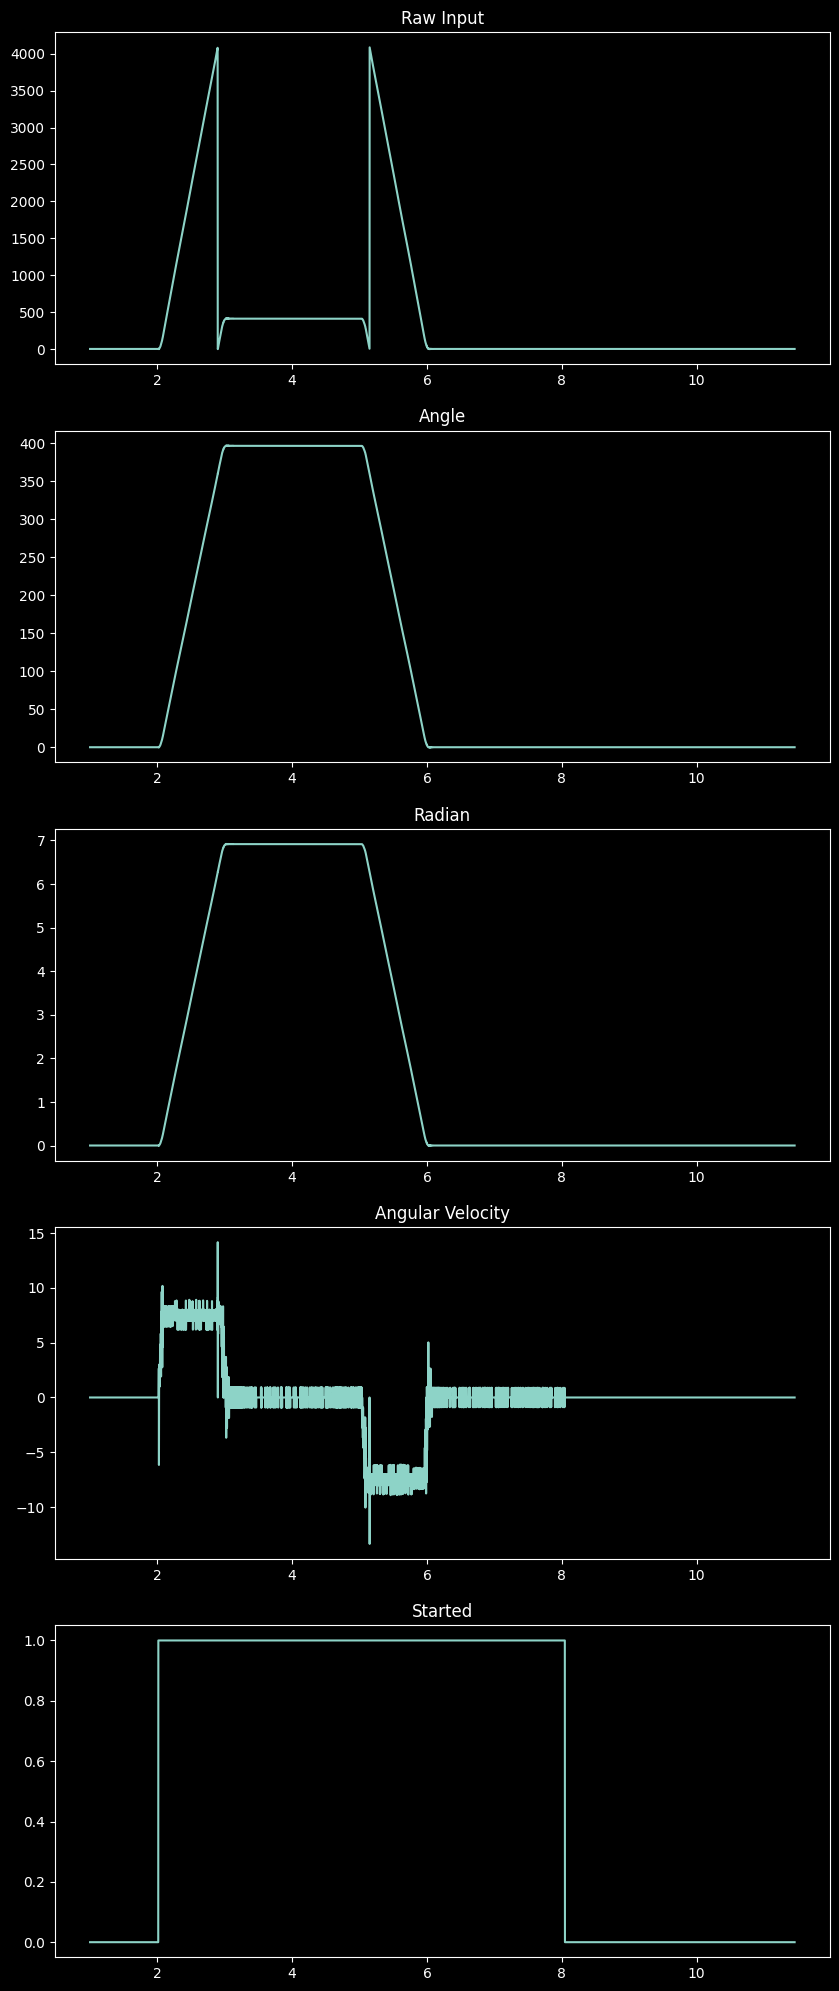

In [312]:
# Plot
fig, ax = plt.subplots(len(columns) - 1, 1, figsize=(10, 25))
for i, column in enumerate(columns[:-1]):
    ax[i].plot(df['Time'], df[column])
    ax[i].set_title(column)

plt.show()

In [313]:
import numpy as np
from scipy.signal import butter, filtfilt

dfCopy = df.copy()
dfCopy['Time'] = dfCopy['Time'] - dfCopy['Time'].min()

# Calculate angular velocity
dfCopy['Angular Velocity'] = dfCopy['Radian'].diff() / dfCopy['Time'].diff()
dfCopy['Angular Velocity'] = dfCopy['Angular Velocity'].fillna(0)

# Apply low pass filter
dfCopy['Angular Velocity Filtered'] = dfCopy['Angular Velocity'].rolling(window=10).mean()
dfCopy[600:605]

,Raw Input,Angle,Radian,Angular Velocity,Started,Time,Angular Velocity Filtered
1176,33,2.901099,0.050634,3.879530,1,1.040718,2.820974
1177,35,3.076923,0.053702,1.919142,1,1.042317,2.713015
1178,37,3.252747,0.056771,1.948386,1,1.043892,2.607588
1179,42,3.692308,0.064443,4.806874,1,1.045488,2.990918
1180,46,4.043956,0.070580,3.869745,1,1.047074,3.185978


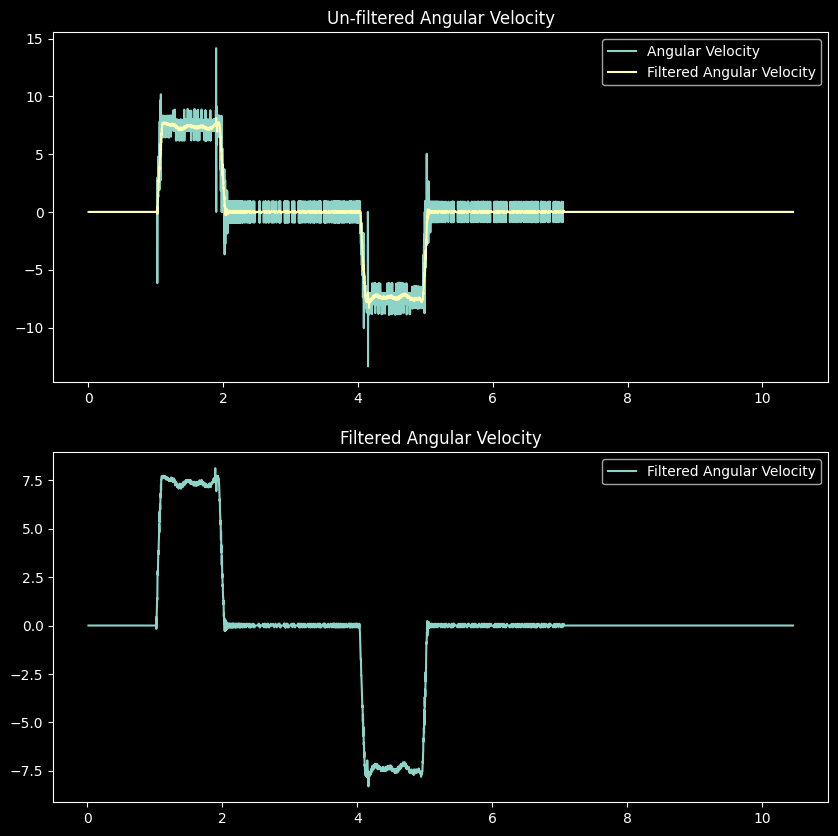

In [314]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(dfCopy['Time'], dfCopy['Angular Velocity'])
ax[0].plot(dfCopy['Time'], dfCopy['Angular Velocity Filtered'])
ax[1].plot(dfCopy['Time'], dfCopy['Angular Velocity Filtered'])

ax[0].set_title('Un-filtered Angular Velocity')
ax[1].set_title('Filtered Angular Velocity')

ax[0].legend(['Angular Velocity', 'Filtered Angular Velocity'])
ax[1].legend(['Filtered Angular Velocity'])

In [315]:
dfCopy.max()

Raw Input                    4085.000000
Angle                         396.483516
Radian                          6.919937
Angular Velocity               14.165993
Started                         1.000000
Time                           10.454646
Angular Velocity Filtered       8.124306
dtype: float64

In [316]:
df2sec = dfCopy[dfCopy['Time'].between(1.6, 1.8)]
df2sec.head()

,Raw Input,Angle,Radian,Angular Velocity,Started,Time,Angular Velocity Filtered
1504,2685,236.043956,4.119741,7.132384,1,1.600801,7.242151
1505,2693,236.747253,4.132016,7.078912,1,1.602535,7.245401
1506,2702,237.538462,4.145825,7.922655,1,1.604278,7.325256
1507,2710,238.241758,4.158100,7.006183,1,1.606030,7.324055
1508,2718,238.945055,4.170374,7.070756,1,1.607766,7.238410


In [317]:
df2sec['Angular Velocity'].mean()

7.293242207656746

In [318]:
df2sec['Angular Velocity Filtered'].mean()

7.2964716633766376